# Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import classification_report

from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/SDS336Project/Camera_Traffic_Counts2_20250918.csv'
df = pd.read_csv(file_path)


In [ ]:
monthly_avg = df.groupby('Month')['Speed'].mean().sort_index()

# Plot
plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='bar', color='skyblue', edgecolor='black')

# Labels and title
plt.xlabel('Month')
plt.ylabel('Average Speed')
plt.title('Average Speed by Month')
plt.xticks(rotation=0)  # Keep month labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

In [ ]:
df[df['Month'] == 1].head()

,Record ID,ATD Device ID,Read Date,Intersection Name,Direction,Movement,Heavy Vehicle,Volume,Speed Average (Miles Per Hour),Speed StdDev,Seconds in Zone Average,Seconds in Zone StdDev,Month,Day,Year,Hour,Minute,Day of Week,Bin Duration (Seconds)
4824792,cb1261e3d45ef5e6a01c6135ab41315f,6523,01/01/2019 12:00:00 AM,IH 35 SVRD / N IH 35 SVRD SB AT 41ST TRN,EASTBOUND,LEFT TURN,True,3,24.333,2.309,1.167,0.961,1,1,2019,0,0,2,900
4824793,e90323e9cd46aa9513e1186345452069,6523,01/01/2019 12:00:00 AM,IH 35 SVRD / N IH 35 SVRD SB AT 41ST TRN,EASTBOUND,THRU,False,1,6.000,0.000,0.600,0.000,1,1,2019,0,0,2,900
4824794,731362838447e304be1ec295d31fe916,6523,01/01/2019 12:00:00 AM,IH 35 SVRD / N IH 35 SVRD SB AT 41ST TRN,EASTBOUND,THRU,True,13,21.077,12.446,2.623,1.884,1,1,2019,0,0,2,900
4824795,0d0e5e9400da9464af294e88ac78364b,6523,01/01/2019 12:00:00 AM,IH 35 SVRD / N IH 35 SVRD SB AT 41ST TRN,NORTHBOUND,LEFT TURN,True,2,19.500,2.121,0.750,0.212,1,1,2019,0,0,2,900
4824796,52a7b64348241d1d3c786fac40d275ec,6523,01/01/2019 12:00:00 AM,IH 35 SVRD / N IH 35 SVRD SB AT 41ST TRN,NORTHBOUND,THRU,False,14,26.000,19.291,3.314,5.152,1,1,2019,0,0,2,900


## Data Setup

Temporary Dataset

In [ ]:
import pandas as pd

# URL for the full 2024 dataset
url = 'https://data.austintexas.gov/api/views/sh59-i6y9/rows.csv?accessType=DOWNLOAD&year=2024'

# Read the CSV in chunks to avoid memory issues
chunksize = 500000  # adjust if needed
chunks = []

for chunk in pd.read_csv(url, chunksize=chunksize):
    chunks.append(chunk)

# Concatenate all chunks
df = pd.concat(chunks, ignore_index=True)

# Randomly sample 5000 rows
sample_df = df.sample(n=5000, random_state=42)

# Save the small CSV
sample_df.to_csv('traffic_data_sample_5000.csv', index=False)

print("Sample saved as traffic_data_sample_5000.csv")


KeyboardInterrupt: 

In [ ]:
df.head()

,record_id,atd_device_id,read_date,intersection_name,direction,movement,heavy_vehicle,volume,speed_average,speed_stddev,seconds_in_zone_average,seconds_in_zone_stddev,month,day,year,hour,minute,day_of_week,bin_duration
0,12c9a77bc74a6c3e229d70288817d994,6343,2019-11-08T08:00:00.000,SPICEWOOD SPRINGS RD / WOOD HOLLOW DR,EASTBOUND,THRU,False,501,14.419,5.051,3.720,10.838,11,8,2019,8,0,5,900
1,09875f12c4c1e91978d93b062dec47bc,6170,2019-11-09T14:15:00.000,CAPITAL OF TEXAS HWY / WEST GATE BLVD,NORTHBOUND,THRU,False,501,38.968,13.481,3.583,8.636,11,9,2019,14,15,6,900
2,34525aad3dff53977adb2e84a4697211,6211,2019-11-11T07:30:00.000,PARMER LN /,EASTBOUND,THRU,False,501,33.401,9.938,4.440,10.296,11,11,2019,7,30,1,900
3,80cc54f03aabb7672ef512f76ec9ed33,6957,2019-11-12T08:30:00.000,SLAUGHTER LN /,WESTBOUND,THRU,False,501,32.028,7.233,0.765,0.467,11,12,2019,8,30,2,900
4,940a3059e28194a072f8a20b540ed4a0,6212,2019-11-13T16:00:00.000,PARMER LN / LAMPLIGHT VILLAGE AVE,WESTBOUND,THRU,False,501,39.495,9.637,3.301,10.639,11,13,2019,16,0,3,900


In [ ]:
X = df['day_of_week']
y = df[['speed_average']]

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

# Reshape X_train and X_test to be 2-dimensional
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

# Fit model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 105.09
Root Mean Squared Error: 10.25
Mean Absolute Error: 8.00
R² Score: -0.01


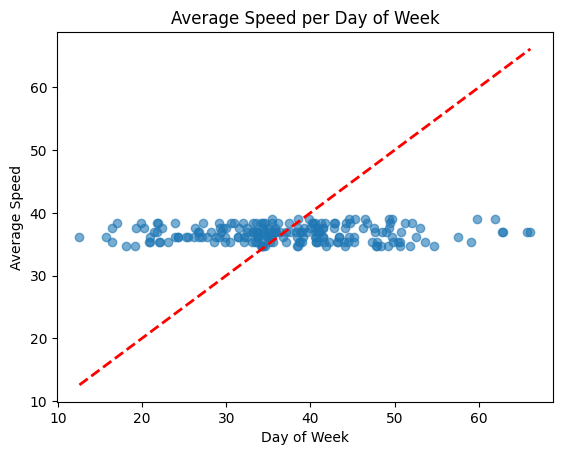

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2)  # reference line
plt.xlabel("Day of Week")
plt.ylabel("Average Speed")
plt.title("Average Speed per Day of Week")
plt.show()